<a href="https://colab.research.google.com/github/AymanKamran/AXLE-DevSecOps-ToolChain/blob/master/Solution_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Google Toronto DevFest 2020 Machine Learning Competition</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

Let's start by our imports and env setup.

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# loading datasets from github (Excel - must be in raw view)
TrainExcelUrl = "https://github.com/AymanKamran/Google-DevFest2020-Toronto/blob/main/data/Excel_Training_Data.xlsx?raw=true"
train = pd.read_excel(TrainExcelUrl,  )

TestExcelUrl = "https://github.com/AymanKamran/Google-DevFest2020-Toronto/blob/main/data/Testing%20Dataset.xlsx?raw=true"
test = pd.read_excel(TestExcelUrl)

ValidationExcelUrl = "https://github.com/AymanKamran/Google-DevFest2020-Toronto/blob/main/data/Validation%20Dataset.xlsx?raw=true"
validation = pd.read_excel(ValidationExcelUrl, )


#loading datasets from github (github url of CSV file - Must view raw)
TrainUrl = "https://raw.githubusercontent.com/AymanKamran/Google-DevFest2020-Toronto/main/data/Excel_Training_Data.csv"
train2 = pd.read_csv(TrainUrl, sep="delimiter", engine='python', )

TestUrl = "https://raw.githubusercontent.com/AymanKamran/Google-DevFest2020-Toronto/main/data/Testing%20Dataset.csv"
test2 = pd.read_csv(TestUrl, sep='delimiter', engine='python')

ValidationUrl = "https://raw.githubusercontent.com/AymanKamran/Google-DevFest2020-Toronto/main/data/Validation%20Dataset.csv"
validation2 = pd.read_csv(ValidationUrl, sep='delimiter', engine='python')
# test = pd.read_excel(data_path + os.sep + "Testing Dataset.xlsx")
# validation = pd.read_excel(data_path + os.sep + "Validation Dataset.xlsx")

# scripts_path = data_path + os.sep + "Scripts"

## **Let's View our Cleaned Data**

In [8]:
train.head(3)



,title,genres,description_full,Actor Names
0,The Haunting of Alcatraz,Horror,Alcatraz. 1937. A young prison guard working t...,NaN
1,A Bluebird in My Heart,Drama,"Attempting to lead a quiet reformed life, an e...",{Lubna Azabal}
2,1917,"Drama,War","April 1917, the Western Front. Two British sol...","{Benedict Cumberbatch, Andrew Scott, Richard M..."


In [5]:
test.head(3)

,title,genres,description_full,Actor Names
0,The Troubleshooter,"Comedy,Drama","After a failed one-night stand, a mechanic end...",{}
1,The Tango Lesson,"Drama,Music,Romance","On a trip to Paris Sally meets Pablo, a tango ...",{}
2,The Thompsons,"Drama,Horror,Thriller","On the run with the law on their trail, Americ...","{Elizabeth Henstridge, Mackenzie Firgens, Sean..."


In [6]:
validation.head(3)

,title,genres,description_full,Actor Names
0,Dr Jekyll & Sister Hyde,"Horror,Sci-Fi","In Victorian London, Dr. Henry Jekyll attempts...",{Martine Beswick}
1,Carbon Copy,"Action,Comedy,Drama",A white corporate executive is surprised to di...,"{Denzel Washington, George Segal, Jack Warden,..."
2,Basquiat,"Biography,Drama",Basquiat tells the story of the meteoric rise ...,"{Gary Oldman, Benicio Del Toro, Parker Posey, ..."


## **Let's Checkout some of the internals**
Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

In [9]:
print("Lets Look into the first value to train.\nMovie Name : ", train['title'].values[0])
print("Genres: ", train['genres'].values[0])
print("description_full : ", train['description_full'].values[0])
print("Actor Names: ", train['Actor Names'].values[0])

labels = ["Action","Adventure","Animation","Biography","Comedy","Crime","Documentary","Drama","Family","Fantasy","History","Horror","Musical","Mystery","Romance","Sci-Fi","Sport","Thriller","War","Western", "Music", "Film-Noir", "Reality-TV"]
print ("There are ", labels.__len__(), " genres. They are:")
print (labels)
# print("-"*60)
# print("Length of content : ", len(open(scripts_path + os.sep + train['File_Name'].values[0], "r").read()))
# print("-"*60)


Lets Look into the first value to train.
Movie Name :  The Haunting of Alcatraz
Genres:  Horror
description_full :  Alcatraz. 1937. A young prison guard working the night shift experiences a string of chilling disturbances culminating in the bizarre death of an inmate - raising suspicions of not only a supernatural presence but also of deadly corruption on the notorious prisons punishment block . Based on horrifying true events, at the most famous prison in the world, The Haunting Of Alcatraz is a terrifying story of supernatural and real-world horrors.
Actor Names:  nan
There are  23  genres. They are:
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Music', 'Film-Noir', 'Reality-TV']


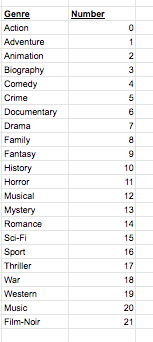

Also, Reality-TV is 22

In [10]:
train

,title,genres,description_full,Actor Names
0,The Haunting of Alcatraz,Horror,Alcatraz. 1937. A young prison guard working t...,NaN
1,A Bluebird in My Heart,Drama,"Attempting to lead a quiet reformed life, an e...",{Lubna Azabal}
2,1917,"Drama,War","April 1917, the Western Front. Two British sol...","{Benedict Cumberbatch, Andrew Scott, Richard M..."
3,Un moment d'Ã©garement,"Comedy,Drama,Romance",Two friends bring their daughters with them on...,"{Vincent Cassel, FranÃ§ois Cluzet}"
4,10 Things I Hate About You,"Action,Comedy,Drama,Romance","Adapted from William Shakespeare's play ""The T...","{Joseph Gordon-Levitt, Heath Ledger, Julia Sti..."
...,...,...,...,...
7517,Lane 1974,"Adventure,Biography,Drama","Based on a true story, Lane is a 13-year-old g...","{Katherine Moennig, Jasmin Savoy Brown, Sara C..."
7518,Mind and Machine,"Crime,Sci-Fi,Thriller",Set in the near future where humanoid robots a...,{}
7519,Girl Lost,"Action,Drama","Born into the seedy, underground world of pros...",{Robin Bain}
7520,Caravan to Vaccares,"Action,Mystery,Thriller",American Neil Bowman is traveling through Fran...,"{Charlotte Rampling, Michael Lonsdale}"


In [10]:
test

,title,genres,description_full,Actor Names
0,The Troubleshooter,"Comedy,Drama","After a failed one-night stand, a mechanic end...",{}
1,The Tango Lesson,"Drama,Music,Romance","On a trip to Paris Sally meets Pablo, a tango ...",{}
2,The Thompsons,"Drama,Horror,Thriller","On the run with the law on their trail, Americ...","{Elizabeth Henstridge, Mackenzie Firgens, Sean..."
3,I Saw What You Did,"Action,Comedy,Crime,Horror,Thriller",When two teenagers make prank phone calls to s...,"{Joan Crawford, John Ireland, Leif Erickson, J..."
4,Psych-Out,Drama,"Jenny, a deaf runaway who has just arrived in ...","{Jack Nicholson, Dean Stockwell, Bruce Dern, G..."
...,...,...,...,...
2068,Fast Colour,"Drama,Sci-Fi,Thriller","After years in hiding, a woman is forced to go...","{Gugu Mbatha-Raw, Lorraine Toussaint, David St..."
2069,WWE Royal Rumble,"Action,Sport","For the superstars of the WWE, the year begins...","{Ronda Rousey, Mike , Randy Orton, C.J. Perry}"
2070,Disappearance,"Romance,Thriller",When author George BoulangÃ© agrees to the wis...,"{Brian Thompson, Cortney Palm, Reggie Lee, Mat..."
2071,Run for the High Country,Western,A seasoned US Marshal is ambushed while tracki...,{}


In [11]:
validation

,title,genres,description_full,Actor Names
0,Dr Jekyll & Sister Hyde,"Horror,Sci-Fi","In Victorian London, Dr. Henry Jekyll attempts...",{Martine Beswick}
1,Carbon Copy,"Action,Comedy,Drama",A white corporate executive is surprised to di...,"{Denzel Washington, George Segal, Jack Warden,..."
2,Basquiat,"Biography,Drama",Basquiat tells the story of the meteoric rise ...,"{Gary Oldman, Benicio Del Toro, Parker Posey, ..."
3,The Projected Man,"Action,Horror,Sci-Fi",A scientist experimenting with matter transmis...,{}
4,Havenhurst,"Horror,Mystery,Thriller",A troubled young woman takes up residence in a...,"{Julie Benz, Danielle Harris, Fionnula Flanaga..."
...,...,...,...,...
2599,Ballad in Blue,"Drama,Music",Ray Charles attempts to help a down-on-their-l...,"{Dawn Addams, Ray Charles, Tom Bell}"
2600,Still,"Drama,Fantasy,Mystery",When a young hiker stumbles onto an isolated f...,"{Lydia Wilson, Kevin Wayne}"
2601,The Last Boy,"Drama,Sci-Fi","With the world's end imminent, a dying mother ...","{Luke Goss, Peter Guinness}"
2602,"Red, White and Zero",Drama,An impassive young girl is taken from her suic...,"{Anthony Hopkins, Arthur Lowe}"


## Data Cleaning
Most cleaning was done using excel, google sheets, and some coding away from the colab. Some more cleaning: Currenlty our "genres" column is in words "horror, comedy", but we must convert this to numbers.

We'll create two more columns:
Test_Column_GenresAsNumber (contains all genres as numbers) - slight bug in this - for some reason it only inlcudes the first character (ie if its supposed to be 18,2,3, it iwll only inluclude 1 (but does not effect our data for now)

Labels = Test_Column_SingleGenre (contains only the main single genre as a number - presumed that the first listed genre is the main one)


##*Data Cleaning for Test**

In [13]:
#First determine length of "Test" csv file (number of rows)
testsLength = len(test['title'])
print (testsLength)

#Now we'll create an empty array of length equal to testsLength. Call this " "Genres as Numbers""This contains all genres
Test_Column_GenresAsNumber = np.empty(testsLength, dtype=str) 
print ("Test_Column_GenresAsNumber is ", Test_Column_GenresAsNumber)

#Now we'll create another empty array of length equal to testsLength. call this Main Genre (not sure if its acc the main genre)
#rather its just the first genre in the column called Genres as Numbers
Test_Column_SingleGenre = np.empty(testsLength, dtype=int) 
print ("Test_Column_SingleGenre is ", Test_Column_SingleGenre)


#Now lets use code to convert all genres from words into numbers. We'll iterate thru the "genres column"
EntireCSVFile = test.head(testsLength) #this contains all rows
# print("HERES EntireCSVFile", EntireCSVFile)

# print ("ENTERING FOR")
for i in range(testsLength):
  #find and replace each genre with its number. sytax: string.replace(old, new, count)
  # print(EntireCSVFile['genres'][i]) 
  current_Genres= EntireCSVFile['genres'][i]
  replacedWithNums = current_Genres.replace("Action", "0", 2).replace("Adventure", "1", 2).replace("Animation", "2", 2).replace("Biography", "3", 2).replace("Comedy", "4", 2).replace("Crime", "5", 2).replace("Documentary", "6", 2).replace("Drama", "7", 2).replace("Family", "8", 2).replace("Fantasy", "9", 2).replace("History", "10", 2).replace("Horror", "11", 2).replace("Musical", "12", 2).replace("Mystery", "13", 2).replace("Romance", "14", 2).replace("Sci-Fi", "15", 2).replace("Sport", "16", 2).replace("Thriller", "17", 2).replace("War", "18", 2).replace("Western", "19", 2).replace("Music", "20", 2).replace("Film-Noir", "21", 2).replace("Reality-TV","22",2)
  # print("replaced: ", replacedWithNums)
  # # push y onto new column
  Test_Column_GenresAsNumber[i] = replacedWithNums
  # print("Test_Column_GenresAsNumber[i] is ", Test_Column_GenresAsNumber[i])
  mainSingleGenre = ""
  for element in replacedWithNums:
    if element == ',' :
      break
    mainSingleGenre += element
  # print ("mainSingleGenre is ", mainSingleGenre)
  Test_Column_SingleGenre[i] = mainSingleGenre

# print ("EXITING FOR")
#Finally, we'll add these 2 columns to our csv Test file.
# pd.DataFrame().drop(columns='Single Genre')
test['Labels'] = Test_Column_SingleGenre
test['Genres As Numbers'] = Test_Column_GenresAsNumber

#print to check it out
test

2073
Test_Column_GenresAsNumber is  ['' '' '' ... '' '' '']
Test_Column_SingleGenre is  [       88588288 139983478825872 139983474197296 ... 139983474195760
 139983476825344 139983476816272]


,title,genres,description_full,Actor Names,Labels,Genres As Numbers
0,The Troubleshooter,"Comedy,Drama","After a failed one-night stand, a mechanic end...",{},4,4
1,The Tango Lesson,"Drama,Music,Romance","On a trip to Paris Sally meets Pablo, a tango ...",{},7,7
2,The Thompsons,"Drama,Horror,Thriller","On the run with the law on their trail, Americ...","{Elizabeth Henstridge, Mackenzie Firgens, Sean...",7,7
3,I Saw What You Did,"Action,Comedy,Crime,Horror,Thriller",When two teenagers make prank phone calls to s...,"{Joan Crawford, John Ireland, Leif Erickson, J...",0,0
4,Psych-Out,Drama,"Jenny, a deaf runaway who has just arrived in ...","{Jack Nicholson, Dean Stockwell, Bruce Dern, G...",7,7
...,...,...,...,...,...,...
2068,Fast Colour,"Drama,Sci-Fi,Thriller","After years in hiding, a woman is forced to go...","{Gugu Mbatha-Raw, Lorraine Toussaint, David St...",7,7
2069,WWE Royal Rumble,"Action,Sport","For the superstars of the WWE, the year begins...","{Ronda Rousey, Mike , Randy Orton, C.J. Perry}",0,0
2070,Disappearance,"Romance,Thriller",When author George BoulangÃ© agrees to the wis...,"{Brian Thompson, Cortney Palm, Reggie Lee, Mat...",14,1
2071,Run for the High Country,Western,A seasoned US Marshal is ambushed while tracki...,{},19,1


##**Data Cleaning for Train**

In [11]:
#First determine length of "train" csv file (number of rows)
trainLength = len(train['title'])
print (trainLength)

#Now we'll create an empty array of length equal to trainLength. Call this " "Genres as Numbers""This contains all genres
train_Column_GenresAsNumber = np.empty(trainLength, dtype=str) 
print ("train_Column_GenresAsNumber is ", train_Column_GenresAsNumber)

#Now we'll create another empty array of length equal to trainLength. call this Main Genre (not sure if its acc the main genre)
#rather its just the first genre in the column called Genres as Numbers
train_Column_SingleGenre = np.empty(trainLength, dtype=int) 
print ("train_Column_SingleGenre is ", train_Column_SingleGenre)


#Now lets use code to convert all genres from words into numbers. We'll iterate thru the "genres column"
EntireCSVFile = train.head(trainLength) #this contains all rows
# print("HERES EntireCSVFile", EntireCSVFile)

# print ("ENTERING FOR")
for i in range(trainLength):
  #find and replace each genre with its number. sytax: string.replace(old, new, count)
  # print(EntireCSVFile['genres'][i]) 
  current_Genres= EntireCSVFile['genres'][i]
  replacedWithNums = current_Genres.replace("Action", "0", 2).replace("Adventure", "1", 2).replace("Animation", "2", 2).replace("Biography", "3", 2).replace("Comedy", "4", 2).replace("Crime", "5", 2).replace("Documentary", "6", 2).replace("Drama", "7", 2).replace("Family", "8", 2).replace("Fantasy", "9", 2).replace("History", "10", 2).replace("Horror", "11", 2).replace("Musical", "12", 2).replace("Mystery", "13", 2).replace("Romance", "14", 2).replace("Sci-Fi", "15", 2).replace("Sport", "16", 2).replace("Thriller", "17", 2).replace("War", "18", 2).replace("Western", "19", 2).replace("Music", "20", 2).replace("Film-Noir", "21", 2).replace("Reality-TV","22",2)
  # print("replaced: ", replacedWithNums)
  # # push y onto new column
  train_Column_GenresAsNumber[i] = replacedWithNums
  # print("train_Column_GenresAsNumber[i] is ", train_Column_GenresAsNumber[i])
  mainSingleGenre = ""
  for element in replacedWithNums:
    if element == ',' :
      break
    mainSingleGenre += element
  # print ("mainSingleGenre is ", mainSingleGenre)
  train_Column_SingleGenre[i] = mainSingleGenre

# print ("EXITING FOR")
#Finally, we'll add these 2 columns to our csv train file.
# pd.DataFrame().drop(columns='Single Genre')
train['Labels'] = train_Column_SingleGenre
train['Genres As Numbers'] = train_Column_GenresAsNumber

#print to check it out
train

7522
train_Column_GenresAsNumber is  ['' '' '' ... '' '' '']
train_Column_SingleGenre is  [       73154560 139939749981976 139939749313712 ... 139939748672816
 139939746289392 139939748674032]


,title,genres,description_full,Actor Names,Labels,Genres As Numbers
0,The Haunting of Alcatraz,Horror,Alcatraz. 1937. A young prison guard working t...,NaN,11,1
1,A Bluebird in My Heart,Drama,"Attempting to lead a quiet reformed life, an e...",{Lubna Azabal},7,7
2,1917,"Drama,War","April 1917, the Western Front. Two British sol...","{Benedict Cumberbatch, Andrew Scott, Richard M...",7,7
3,Un moment d'Ã©garement,"Comedy,Drama,Romance",Two friends bring their daughters with them on...,"{Vincent Cassel, FranÃ§ois Cluzet}",4,4
4,10 Things I Hate About You,"Action,Comedy,Drama,Romance","Adapted from William Shakespeare's play ""The T...","{Joseph Gordon-Levitt, Heath Ledger, Julia Sti...",0,0
...,...,...,...,...,...,...
7517,Lane 1974,"Adventure,Biography,Drama","Based on a true story, Lane is a 13-year-old g...","{Katherine Moennig, Jasmin Savoy Brown, Sara C...",1,1
7518,Mind and Machine,"Crime,Sci-Fi,Thriller",Set in the near future where humanoid robots a...,{},5,5
7519,Girl Lost,"Action,Drama","Born into the seedy, underground world of pros...",{Robin Bain},0,0
7520,Caravan to Vaccares,"Action,Mystery,Thriller",American Neil Bowman is traveling through Fran...,"{Charlotte Rampling, Michael Lonsdale}",0,0


## Data Analysis


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7522 entries, 0 to 7521
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              7522 non-null   object
 1   genres             7522 non-null   object
 2   description_full   7522 non-null   object
 3   Actor Names        7521 non-null   object
 4   Labels             7522 non-null   int64 
 5   Genres As Numbers  7522 non-null   object
dtypes: int64(1), object(5)
memory usage: 352.7+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              2073 non-null   object
 1   genres             2073 non-null   object
 2   description_full   2073 non-null   object
 3   Actor Names        2058 non-null   object
 4   Labels             2073 non-null   int64 
 5   Genres As Numbers  2073 non-null   object
dtypes: int64(1), object(5)
memory usage: 97.3+ KB


In [17]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2604 non-null   object
 1   genres            2604 non-null   object
 2   description_full  2602 non-null   object
 3   Actor Names       2604 non-null   object
dtypes: object(4)
memory usage: 81.5+ KB


------------------------------------
##**Key Notes:**
* We do not have any null/missing/nan values in the datasets (except with the actor values in test - which needs to be removed during data cleaning!)
* The target variable "Genre" is of data type integer (and there is only ONE genre assigned)
* The independent variable description is of type object
* test and validate do not have the column with answers in them



------------------------------------

# Distrbution of Classes - Visualization


Unique number of classes in train :  19


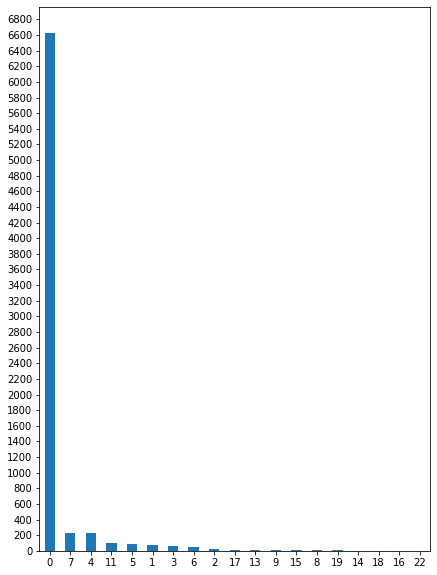

In [13]:
#training set

print("Unique number of classes in train : ", train['Labels'].nunique())
train['Labels'].value_counts().plot(kind = 'bar',figsize=(7,10), rot=0, yticks=range(0,7000,200))



##**Feature Engineering**

'Feature engineering is a fancy term for deriving new features from the existing features. This is part of the exploration strategy that might help us in getting that extra .01% accuracy which in most cases are highly crucial for an ML model.

Let us see how the length of each script contributes in identifying the genre of a movie. This may not seem logical to us. We may think that these are movie scripts and all most all movies have the same stream length. However, there can be a correlation that machines can easily relate. We will explore this by using the feature to predict and compare the model's prediction.'

##**Data PreProcessing**

In [14]:
train['Labels'].value_counts()

0     6625
7      231
4      229
11      95
5       90
1       72
3       60
6       51
2       20
17      15
13       9
9        7
15       6
8        4
19       4
14       1
18       1
16       1
22       1
Name: Labels, dtype: int64

## Data Visualization

# With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To **edit** the code, just click the cell and start editing.

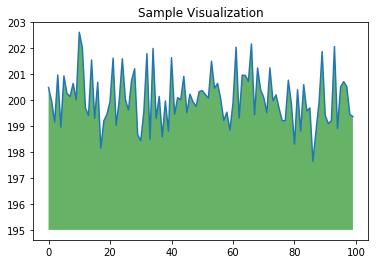

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
